In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pyecharts.charts import *
from pyecharts import options as opts

import seaborn as sns
sns.set(style = 'darkgrid')
# 设置seaborn的绘图风格，注意该行代码要放在matplotlib参数设置之前，避免中文和负号无法正常显示

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 北京租房情况分析

In [2]:
BJ=pd.read_csv('data/链家北京租房数据.csv')
BJ.head()

,Unnamed: 0,区域,小区名称,户型,面积(㎡),价格(元/月),位置
0,0,东城,万国城MOMA,1室0厅,59.11,10000,北京市东城区万国城MOMA
1,1,东城,北官厅胡同2号院,3室0厅,56.92,6000,北京市东城区北官厅胡同2号院
2,2,东城,和平里三区,1室1厅,40.57,6900,北京市东城区和平里三区
3,3,东城,菊儿胡同,2室1厅,57.09,8000,北京市东城区菊儿胡同
4,4,东城,交道口北二条35号院,1室1厅,42.67,5500,北京市东城区交道口北二条35号院


In [3]:
BJ.drop(['Unnamed: 0','小区名称'],inplace=True,axis=1)

BJ.head()

In [5]:
# 描述性统计分析
BJ.describe().T

,count,mean,std,min,25%,50%,75%,max
面积(㎡),5773.0,96.516129,61.510085,11.63,59.15,81.95,112.52,1133.0
价格(元/月),5773.0,9616.677464,9367.993801,566.00,4800.00,6800.00,10500.00,150000.0


In [7]:
BJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5773 entries, 0 to 5772
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   区域       5773 non-null   object 
 1   户型       5773 non-null   object 
 2   面积(㎡)    5773 non-null   float64
 3   价格(元/月)  5773 non-null   int64  
 4   位置       5773 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 225.6+ KB


In [8]:
BJ.区域.value_counts()

朝阳       1597
海淀        605
丰台        577
通州        477
西城        442
大兴        362
昌平        347
顺义        297
门头沟       285
东城        282
房山        180
石景山       175
亦庄开发区     147
Name: 区域, dtype: int64

In [9]:
BJ=BJ.rename(columns={'区域':'行政区','价格(元/月)':'租金(元/月)'})

In [10]:
BJ.head()

,行政区,户型,面积(㎡),租金(元/月),位置
0,东城,1室0厅,59.11,10000,北京市东城区万国城MOMA
1,东城,3室0厅,56.92,6000,北京市东城区北官厅胡同2号院
2,东城,1室1厅,40.57,6900,北京市东城区和平里三区
3,东城,2室1厅,57.09,8000,北京市东城区菊儿胡同
4,东城,1室1厅,42.67,5500,北京市东城区交道口北二条35号院


## 面积，租金分布情况

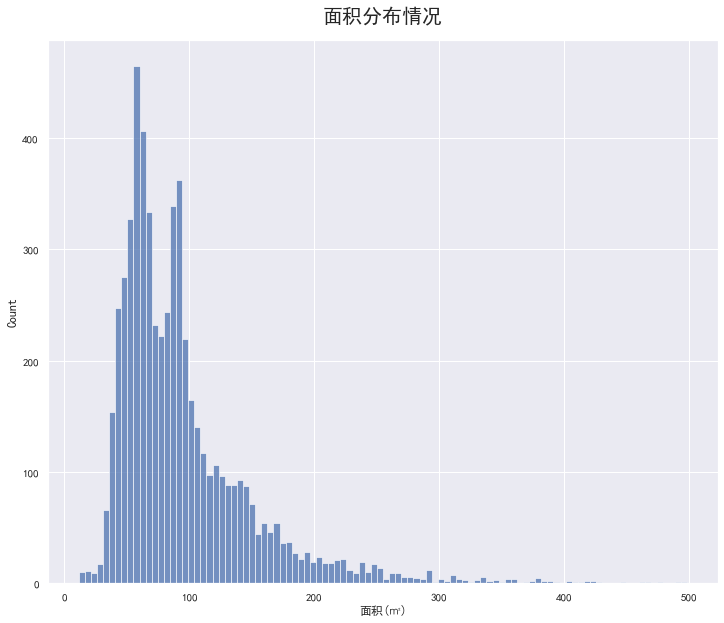

In [11]:
BJ=BJ[BJ['面积(㎡)']<500]
plt.figure(figsize=(12,10))
sns.histplot(x=BJ['面积(㎡)'],bins=100)
plt.title('面积分布情况',fontsize=20,y=1.02)
plt.show()

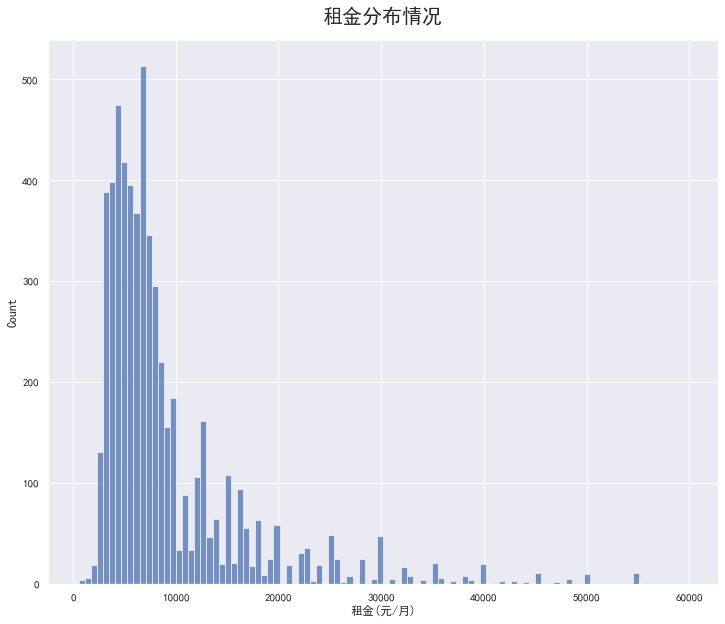

In [12]:
BJ=BJ[BJ['租金(元/月)']<60000]  # 筛选离群值
plt.figure(figsize=(12,10))
sns.histplot(x=BJ['租金(元/月)'],bins=100)
plt.title('租金分布情况',fontsize=20,y=1.02)
plt.show()

## 行政区分析

In [13]:
area = BJ.行政区.value_counts()
area

朝阳       1585
海淀        596
丰台        575
通州        477
西城        436
大兴        362
昌平        345
顺义        293
门头沟       285
东城        280
房山        180
石景山       175
亦庄开发区     147
Name: 行政区, dtype: int64

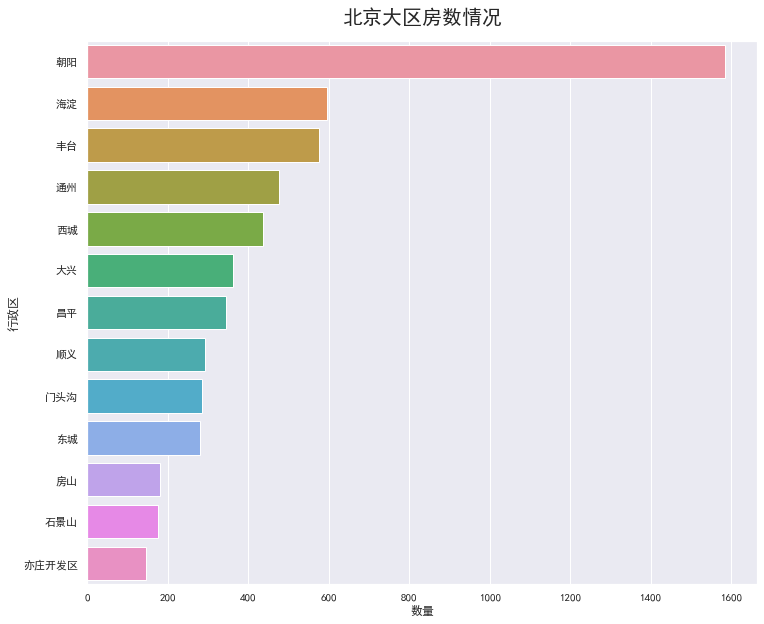

In [14]:
# 绘制条形图，观察区域房源情况
plt.figure(figsize=(12,10))
sns.barplot(y=area.index,x=area)
plt.xlabel('数量')
plt.ylabel('行政区')
plt.title('北京大区房数情况',fontsize=20,y=1.02)
plt.savefig('北京大区房数情况.png')
plt.show()

In [377]:
# 绘制条形图，观察区域租金平均数情况
area_money = BJ.groupby('行政区')['租金(元/月)'].mean().sort_values(ascending=False)
area_money.head()

行政区
东城       13991.312057
西城       12753.337104
朝阳       12699.684408
海淀       12031.983471
亦庄开发区     8968.707483
Name: 租金(元/月), dtype: float64

In [378]:
# 观察区域租金中位数情况
area_money_line = BJ.groupby('行政区')['租金(元/月)'].median().sort_values(ascending=False)
area_money_line.head()

行政区
东城       9400
朝阳       8500
海淀       8300
西城       8050
亦庄开发区    7000
Name: 租金(元/月), dtype: int64

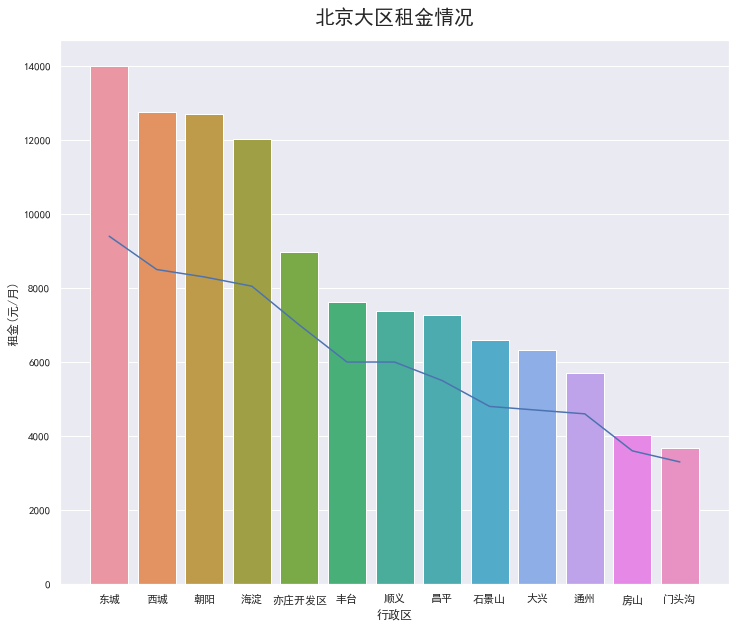

In [379]:
# 绘图，表示租金价格情况
plt.figure(figsize=(12,10))
sns.barplot(y=area_money,x=area_money.index)
sns.lineplot(y=area_money_line,x=area_money_line.index)
plt.title('北京大区租金情况',fontsize=20,y=1.02)
plt.savefig('北京大区租金情况.png')
plt.show()

## 户型分析

In [380]:
#  构建一个提取前n个元素的函数
def Tops(户型,n):
    # n就是要提取的前几位
    Top = BJ.户型.value_counts().head(n).index
    if 户型 in Top:
        # 如果在前n位
        name = 户型
    else:
        # 不在前n位
        name = '其他'
    return name

In [381]:
BJ['户型'].value_counts().head()

2室1厅    2249
1室1厅     844
3室1厅     766
3室2厅     489
2室2厅     265
Name: 户型, dtype: int64

In [382]:
# 将尾部户型统一为其他
BJ['户型1']=BJ.户型.apply(Tops,n=12)

In [383]:
BJ.head()

,行政区,户型,面积(㎡),租金(元/月),位置,户型1
0,东城,1室0厅,59.11,10000,北京市东城区万国城MOMA,1室0厅
1,东城,3室0厅,56.92,6000,北京市东城区北官厅胡同2号院,其他
2,东城,1室1厅,40.57,6900,北京市东城区和平里三区,1室1厅
3,东城,2室1厅,57.09,8000,北京市东城区菊儿胡同,2室1厅
4,东城,1室1厅,42.67,5500,北京市东城区交道口北二条35号院,1室1厅


In [384]:
# 提取出需要的列
BJ=BJ[['行政区','户型1','面积(㎡)','租金(元/月)']]
BJ.head()

,行政区,户型1,面积(㎡),租金(元/月)
0,东城,1室0厅,59.11,10000
1,东城,其他,56.92,6000
2,东城,1室1厅,40.57,6900
3,东城,2室1厅,57.09,8000
4,东城,1室1厅,42.67,5500


In [385]:
typeBJ = BJ.户型1.value_counts().sort_values(ascending=False)
typeBJ

2室1厅    2249
1室1厅     844
3室1厅     766
3室2厅     489
其他       280
2室2厅     265
1室0厅     244
4室2厅     191
1室1卫     126
2室1卫     120
3室1卫      92
4室1厅      58
5室2厅      49
Name: 户型1, dtype: int64

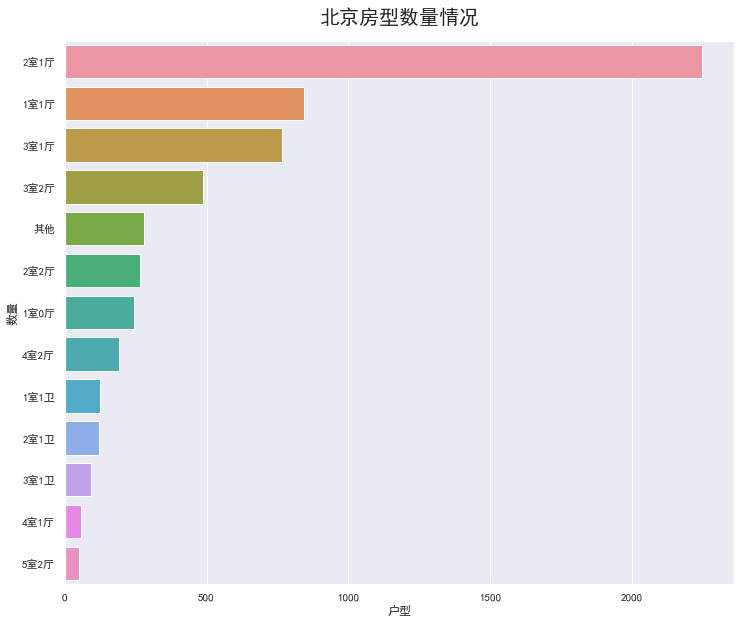

In [386]:
plt.figure(figsize=(12,10))
sns.barplot(x=typeBJ,y=typeBJ.index)
plt.xlabel('户型')
plt.ylabel('数量')
plt.title('北京房型数量情况',fontsize=20,y=1.02)
plt.savefig('北京房型数量情况.png')
plt.show()

In [387]:
typeBJ_money = BJ.groupby('户型1')['租金(元/月)'].mean().sort_values(ascending=False)
typeBJ_money.head()

户型1
5室2厅    31181.632653
4室2厅    24561.256545
其他      19237.378571
4室1厅    18500.000000
3室2厅    15322.290389
Name: 租金(元/月), dtype: float64

In [388]:
typeBJ_money_line = BJ.groupby('户型1')['租金(元/月)'].median().sort_values(ascending=False)
typeBJ_money_line.head()

户型1
5室2厅    29000
4室2厅    21000
4室1厅    15250
3室2厅    13000
其他      11000
Name: 租金(元/月), dtype: int64

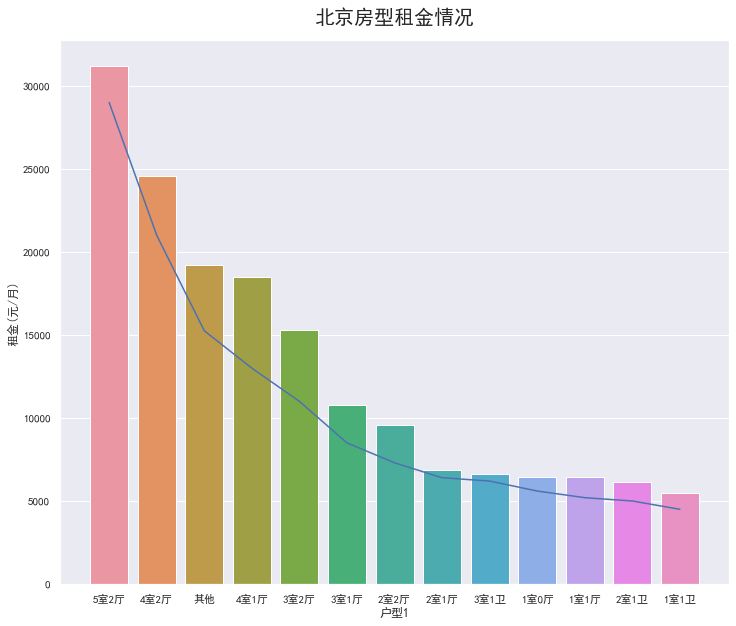

In [389]:
# 绘图，表示租金价格情况
plt.figure(figsize=(12,10))
sns.barplot(y=typeBJ_money ,x=typeBJ_money.index)
sns.lineplot(y=typeBJ_money_line,x=typeBJ_money_line.index)
plt.title('北京房型租金情况',fontsize=20,y=1.02)
plt.savefig('北京房型租金情况.png')
plt.show()

## 租金与面积分析

In [390]:
df_BJ=BJ[['租金(元/月)','面积(㎡)']].corr()
df_BJ          # 正相关

,租金(元/月),面积(㎡)
租金(元/月),1.000000,0.720814
面积(㎡),0.720814,1.000000


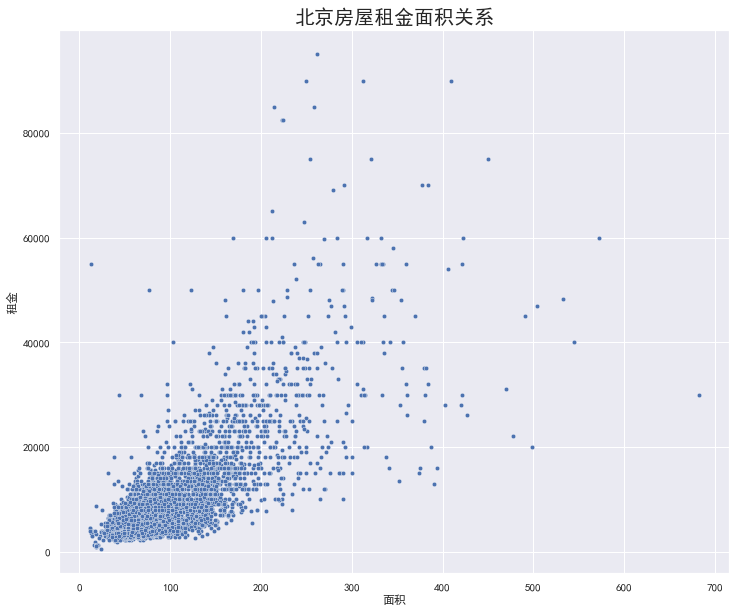

In [391]:
plt.figure(figsize=(12,10))
x=BJ[BJ['面积(㎡)']<700]['面积(㎡)']
y=BJ[BJ['租金(元/月)']<100000]['租金(元/月)']
sns.scatterplot(x=x,y=y,s=20)
plt.xlabel('面积')
plt.ylabel('租金')
plt.title('北京房屋租金面积关系',fontsize=20)
plt.savefig('北京房屋租金面积关系.png')
plt.show()

## 租金面积分箱

In [392]:
df_BJ1=BJ[['租金(元/月)','面积(㎡)']]
df_BJ1.head()

,租金(元/月),面积(㎡)
0,10000,59.11
1,6000,56.92
2,6900,40.57
3,8000,57.09
4,5500,42.67


In [393]:
# 筛选隔离离群值
df_BJ1=df_BJ1[df_BJ1['租金(元/月)']<100000]
df_BJ1=df_BJ1[df_BJ1['面积(㎡)']<700]
df_BJ1.max()

租金(元/月)    95000.00
面积(㎡)        682.08
dtype: float64

In [394]:
# 分箱
df_BJ1['面积分布']=pd.cut(df_BJ1['面积(㎡)'],bins=[10,30,50,70,90,120,150,300,700])
df_BJ1['租金分布']=pd.cut(df_BJ1['租金(元/月)'],bins=[1000,2500,4000,5500,7000,8500,10000,12000,15000,35000,100000])

In [395]:
df_BJ1.head()

,租金(元/月),面积(㎡),面积分布,租金分布
0,10000,59.11,"(50, 70]","(8500, 10000]"
1,6000,56.92,"(50, 70]","(5500, 7000]"
2,6900,40.57,"(30, 50]","(5500, 7000]"
3,8000,57.09,"(50, 70]","(7000, 8500]"
4,5500,42.67,"(30, 50]","(4000, 5500]"


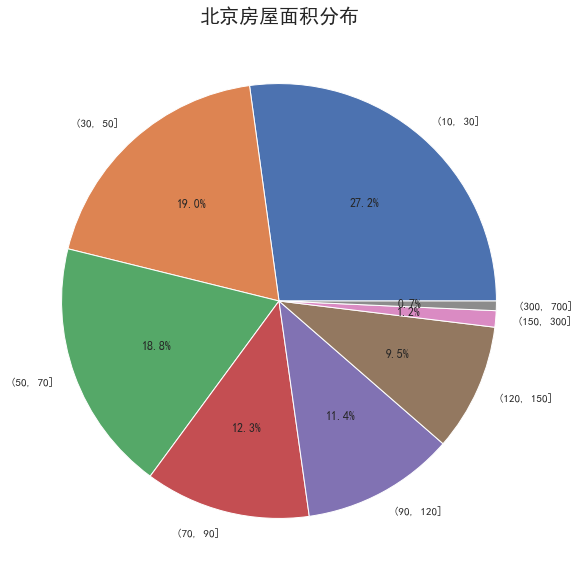

In [396]:
# 绘制饼图
plt.figure(figsize=(12,10))
data=df_BJ1.面积分布.value_counts()
plt.pie(data,
        labels=data.index.categories,
        autopct='%.1f%%'
)
plt.title('北京房屋面积分布',fontsize=20)
plt.savefig('北京房屋面积分布.png')
plt.show()

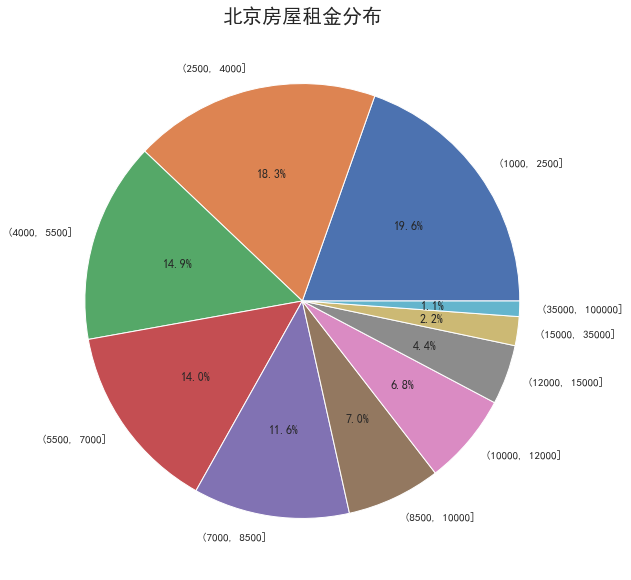

In [397]:
# 绘制饼图
plt.figure(figsize=(12,10))
data=df_BJ1.租金分布.value_counts()
plt.pie(data,
        labels=data.index.categories,
        autopct='%.1f%%'
)
plt.title('北京房屋租金分布',fontsize=20)
plt.savefig('北京房屋租金分布.png')
plt.show()

## 建立回归模型

In [398]:
# 数据处理
BJ=BJ[BJ['租金(元/月)']<100000]
BJ=BJ[BJ['面积(㎡)']<700]
BJ['面积分布']=pd.cut(BJ['面积(㎡)'],bins=[10,30,50,70,90,120,150,300,700])
BJ['租金分布']=pd.cut(BJ['租金(元/月)'],bins=[1000,2500,4000,5500,7000,8500,10000,12000,15000,35000,100000])

In [399]:
# 对分类变量独热编码
area_onehot=pd.get_dummies(BJ.行政区,prefix='大区')
area_onehot.head()

,大区_东城,大区_丰台,大区_亦庄开发区,大区_大兴,大区_房山,大区_昌平,大区_朝阳,大区_海淀,大区_石景山,大区_西城,大区_通州,大区_门头沟,大区_顺义
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0


In [400]:
type_onehot=pd.get_dummies(BJ.户型1,prefix='户型')
type_onehot.head()

,户型_1室0厅,户型_1室1卫,户型_1室1厅,户型_2室1卫,户型_2室1厅,户型_2室2厅,户型_3室1卫,户型_3室1厅,户型_3室2厅,户型_4室1厅,户型_4室2厅,户型_5室2厅,户型_其他
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0


In [401]:
# 连接需要的数据
Data=pd.concat([BJ[['租金(元/月)','面积(㎡)']],area_onehot,type_onehot],axis=1)
Data.head()

,租金(元/月),面积(㎡),大区_东城,大区_丰台,大区_亦庄开发区,大区_大兴,大区_房山,大区_昌平,大区_朝阳,大区_海淀,...,户型_2室1卫,户型_2室1厅,户型_2室2厅,户型_3室1卫,户型_3室1厅,户型_3室2厅,户型_4室1厅,户型_4室2厅,户型_5室2厅,户型_其他
0,10000,59.11,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6000,56.92,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6900,40.57,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8000,57.09,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5500,42.67,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [402]:
Data.to_csv('data/BJ_data.csv')

In [405]:
data=pd.read_csv('data/BJ_data.csv')
data

,Unnamed: 0,租金(元/月),面积(㎡),大区_东城,大区_丰台,大区_亦庄开发区,大区_大兴,大区_房山,大区_昌平,大区_朝阳,...,户型_2室1卫,户型_2室1厅,户型_2室2厅,户型_3室1卫,户型_3室1厅,户型_3室2厅,户型_4室1厅,户型_4室2厅,户型_5室2厅,户型_其他
0,0,10000,59.11,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,6000,56.92,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,6900,40.57,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8000,57.09,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,5500,42.67,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5760,5768,5500,114.03,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5761,5769,5000,59.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5762,5770,5800,92.41,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5763,5771,4200,71.81,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [406]:
data=data.drop('Unnamed: 0',axis=1)

In [407]:
# 拆分目标变量y和特征变量X
Data_X=Data.drop(['租金(元/月)'],axis=1)
Data_y=Data['租金(元/月)']

In [412]:
# 数据拆分为测试集和训练集比例为0.2
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(Data_X, 
                                                    Data_y, 
                                                    test_size=0.2, 
                                                    random_state=421)

In [413]:
# 模型训练,线性回归
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [414]:
# 模型预测
test_y_pre=model.predict(test_x)

In [415]:
# 模型评估R2
from sklearn.metrics import r2_score
print(r2_score(test_y,test_y_pre))

0.7159584427224335


In [416]:
# 准确率大概有71%

In [417]:
# 随机森林算法训练 
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor() 
model.fit(train_x,train_y)

RandomForestRegressor()

In [418]:
# 模型预测
test_y_pre=model.predict(test_x)

In [419]:
# 模型评估R2
from sklearn.metrics import r2_score
print(r2_score(test_y,test_y_pre))

0.7313539242136797


In [ ]:
# 准确率大概有73%